# Personality Prediction using Machine Learning

This project uses psychological traits to predict personality types.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load and Preprocess the Dataset

In [4]:
df = pd.read_csv(r"C:\\Users\\bajaj\\OneDrive\\Documents\\dataset_personality_analysis.csv")

# Drop unnecessary columns
df.drop(columns=['Registration No.', 'Name'], inplace=True)

# Encode categorical columns
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_interest = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Education'] = le_edu.fit_transform(df['Education'])
df['Interest'] = le_interest.fit_transform(df['Interest'])

# Create a list of MBTI types and match it exactly to DataFrame length
mbti_types = ['INTJ', 'ENFP', 'ISTP', 'ENTJ', 'ISFJ']
df['MBTI'] = (mbti_types * ((len(df) // len(mbti_types)) + 1))[:len(df)]

# Map MBTI to broader personality groups
mbti_to_label = {
    'INTJ': 'Analyst',
    'ENTJ': 'Leader',
    'ENFP': 'Supporter',
    'ISFJ': 'Helper',
    'ISTP': 'Doer'
}

df['Personality_Label'] = df['MBTI'].map(mbti_to_label)



In [7]:
#Visualize the Traits


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of personality traits
traits = ['Openness (%)', 'Conscientiousness (%)', 'Extroversion (%)', 
          'Agreeableness (%)', 'Neuroticism (%)', 'Dominance (%)', 
          'Risk Taking (%)', 'Emotional Stability (%)']

# Set a consistent visual style
sns.set(style="whitegrid")


In [10]:
#1. Correlation Heatmap4

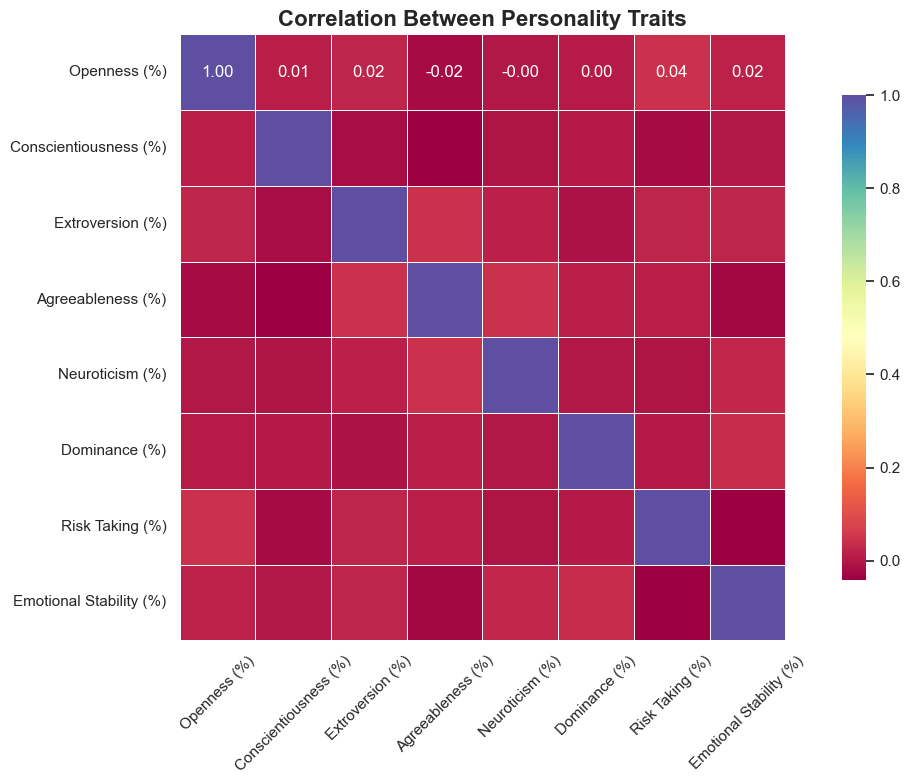

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[traits].corr(), annot=True, fmt=".2f", cmap="Spectral", 
            linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Between Personality Traits", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
#2. Boxplots for Outlier Detection

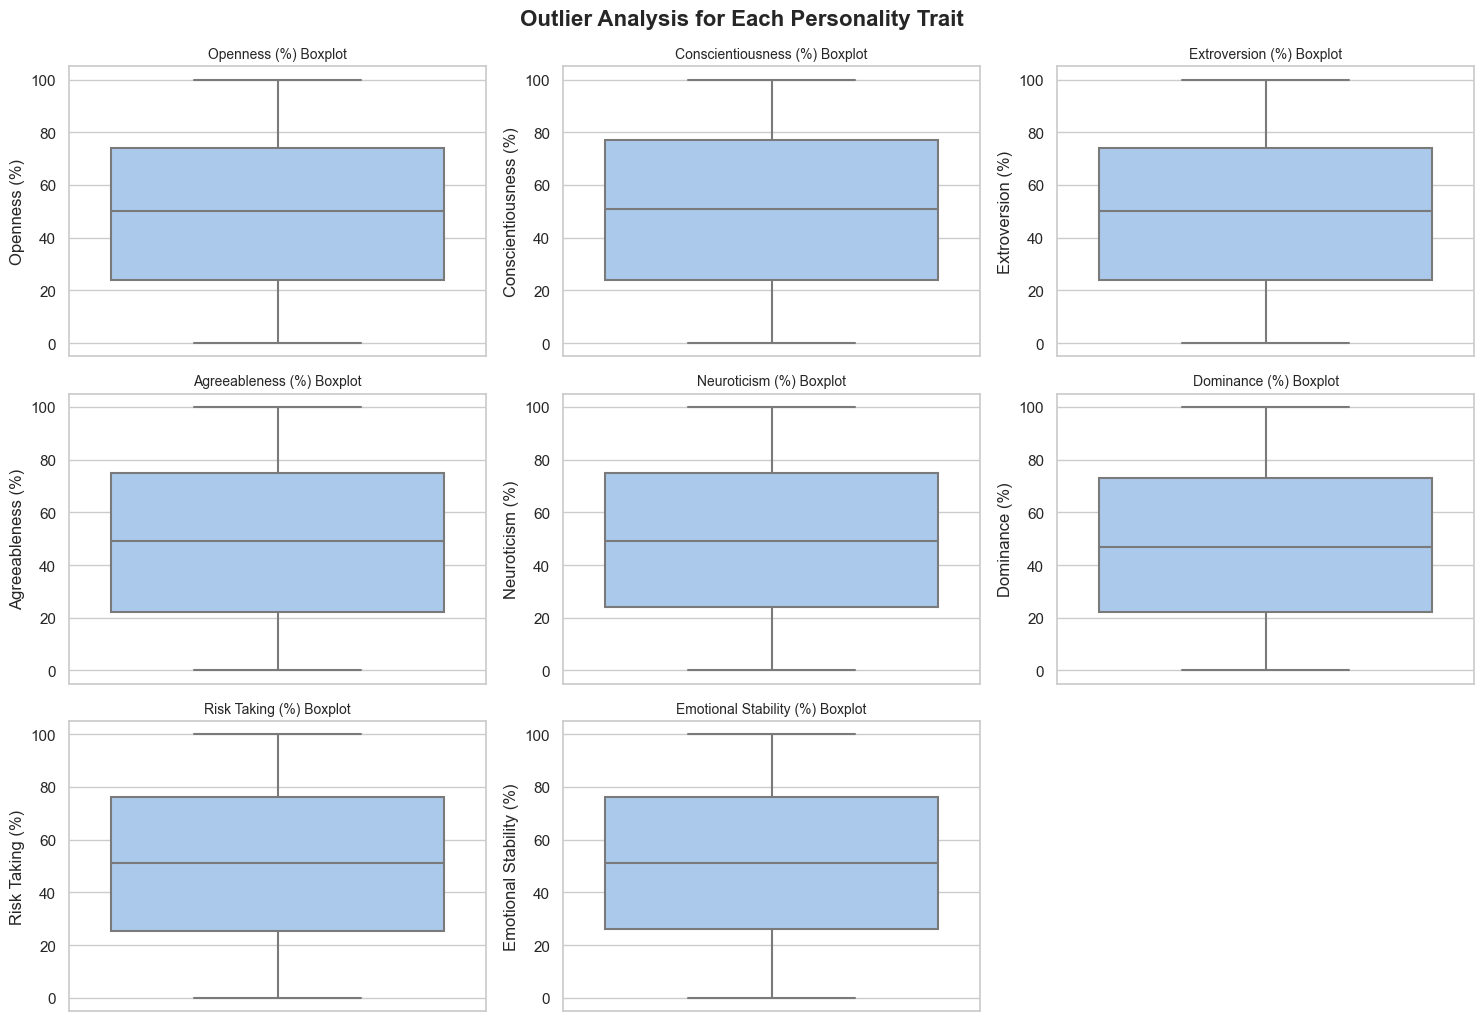

In [17]:
plt.figure(figsize=(15, 10))
for i, trait in enumerate(traits):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[trait], palette="pastel")
    plt.title(f"{trait} Boxplot", fontsize=10)
    plt.tight_layout()
plt.suptitle("Outlier Analysis for Each Personality Trait", fontsize=16, fontweight='bold', y=1.02)
plt.show()


In [18]:
#3. Radar Chart for a Sample Person


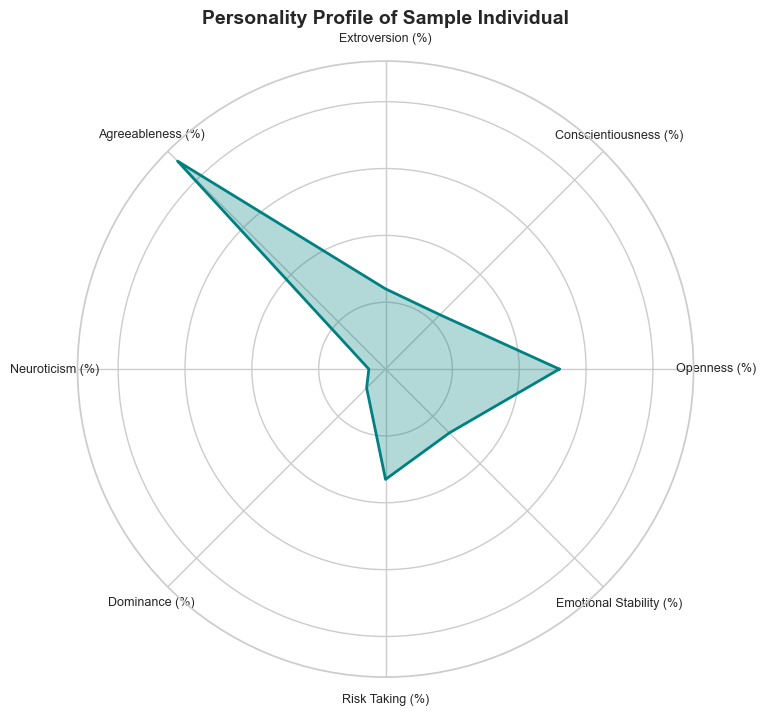

In [19]:
import numpy as np

# Example: Show radar chart for first person in df
sample = df[traits].iloc[0]
labels = np.array(traits)
values = sample.values.flatten().tolist()

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', linewidth=2)
ax.fill(angles, values, color='teal', alpha=0.3)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
plt.title("Personality Profile of Sample Individual", fontsize=14, fontweight='bold')
plt.show()


# Predict MBTI and Custom Labels

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

features = ['Age', 'Gender', 'Education', 'Interest',
            'Emotional Stability (%)', 'Conscientiousness (%)', 'Openness (%)',
            'Thinking Score', 'Extroversion (%)', 'Agreeableness (%)',
            'Neuroticism (%)', 'Dominance (%)', 'Risk Taking (%)']

# Predict MBTI
X = df[features]
y_mbti = df['MBTI']
y_label = df['Personality_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y_mbti, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("MBTI Prediction:\n", classification_report(y_test, y_pred))

# Predict Personality Label
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Personality Label Prediction:\n", classification_report(y_test, y_pred))


MBTI Prediction:
               precision    recall  f1-score   support

        ENFP       0.20      0.27      0.23        77
        ENTJ       0.20      0.24      0.22        75
        INTJ       0.25      0.20      0.23        83
        ISFJ       0.23      0.19      0.21        83
        ISTP       0.18      0.15      0.16        80

    accuracy                           0.21       398
   macro avg       0.21      0.21      0.21       398
weighted avg       0.21      0.21      0.21       398

Personality Label Prediction:
               precision    recall  f1-score   support

     Analyst       0.20      0.16      0.18        83
        Doer       0.21      0.24      0.22        80
      Helper       0.16      0.16      0.16        83
      Leader       0.20      0.24      0.22        75
   Supporter       0.25      0.25      0.25        77

    accuracy                           0.21       398
   macro avg       0.21      0.21      0.21       398
weighted avg       0.21     

# Clustering Users (Unsupervised)

C:\Users\bajaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


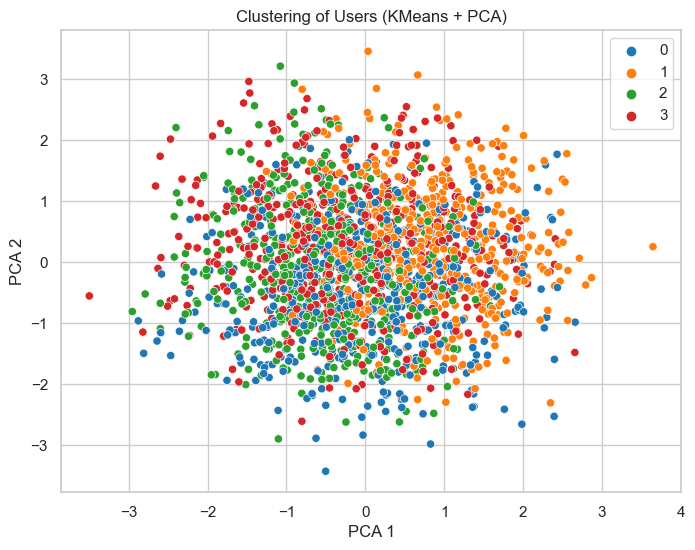

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
plt.title("Clustering of Users (KMeans + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# Binary Classification: Introvert & High Stability

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --- Step 1: Ensure required columns exist ---

# Define personality traits as features
traits = ['Openness (%)', 'Conscientiousness (%)', 'Extroversion (%)',
          'Agreeableness (%)', 'Neuroticism (%)', 'Dominance (%)',
          'Risk Taking (%)', 'Emotional Stability (%)']

# --- Step 2: Create target columns ---

# Introvert: 1 = Introvert (Extroversion < 50), 0 = Extrovert
df['Introvert'] = df['Extroversion (%)'].apply(lambda x: 1 if x < 50 else 0)

# High_Stability: 1 = Emotionally Stable (≥ 50), 0 = Less Stable
df['High_Stability'] = df['Emotional Stability (%)'].apply(lambda x: 1 if x >= 50 else 0)

# --- Step 3: Define feature set X ---
X = df[traits]

# --- Step 4: Train model to predict Introvert ---
X_train, X_test, y_train, y_test = train_test_split(X, df['Introvert'], test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("📊 Introvert Prediction Report:\n")
print(classification_report(y_test, y_pred))

# --- Step 5: Train model to predict High Emotional Stability ---
X_train, X_test, y_train, y_test = train_test_split(X, df['High_Stability'], test_size=0.2, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("📊 High Emotional Stability Prediction Report:\n")
print(classification_report(y_test, y_pred))


📊 Introvert Prediction Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       175

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

📊 High Emotional Stability Prediction Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       217

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



# Best Model Selection

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    score = cross_val_score(model, X, df['MBTI'], cv=5, scoring='accuracy').mean()
    print(f"{name}: {score:.4f}")


Random Forest: 0.2109
SVM: 0.1958
KNN: 0.1872
Gradient Boosting: 0.2053
